In this notebook, we perform Monte Carlo simulation of asset and portfolio
returns based on historical data. The goal is to generate possible future
scenarios and analyze their distribution and risk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
raw = yf.download(
    ["IBM", "GOOG"],
    start="2007-07-01",
    end="2013-06-30",
    auto_adjust=True
)

S = raw["Close"]
S.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,IBM
Date,,
2007-07-02,13.111646,55.284420
2007-07-03,13.209542,56.110958
2007-07-05,13.389760,56.884872
2007-07-06,13.334633,57.400822
2007-07-09,13.412749,57.369194


In [3]:
returns = np.log(S / S.shift(1)).dropna()
returns.head()

Ticker,GOOG,IBM
Date,,
2007-07-03,0.007439,0.014840
2007-07-05,0.013551,0.013698
2007-07-06,-0.004126,0.009029
2007-07-09,0.005841,-0.000551
2007-07-10,0.001437,-0.003125


**Model Calibration**

We assume that daily log-returns follow a normal distribution.
The mean and standard deviation are estimated from historical data.

In [5]:
mu = returns.mean()
sigma = returns.std()

mu, sigma

(Ticker
 GOOG    0.000336
 IBM     0.000467
 dtype: float64,
 Ticker
 GOOG    0.020984
 IBM     0.015495
 dtype: float64)

**Monte Carlo Setup**

We simulate future returns assuming that the statistical properties
of returns remain unchanged.

In [6]:
T = 252        # number of trading days (1 year)
N = 10000      # number of Monte Carlo paths

**Monte Carlo Simulation: Single Asset**

We first simulate future price paths for a single asset (GOOG).

In [7]:
mu_g = mu["GOOG"]
sigma_g = sigma["GOOG"]

simulated_returns = np.random.normal(
    mu_g,
    sigma_g,
    size=(T, N)
)

In [8]:
S0 = S["GOOG"].iloc[-1]

price_paths = S0 * np.exp(np.cumsum(simulated_returns, axis=0))
price_paths.shape

(252, 10000)

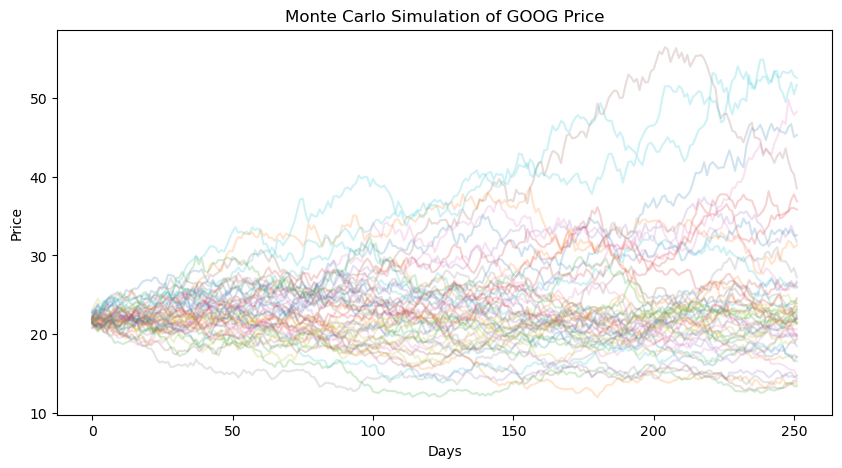

In [9]:
plt.figure(figsize=(10,5))
plt.plot(price_paths[:, :50], alpha=0.2)
plt.title("Monte Carlo Simulation of GOOG Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

**Distribution of Terminal Prices**

We examine the distribution of prices at the end of the simulation horizon.


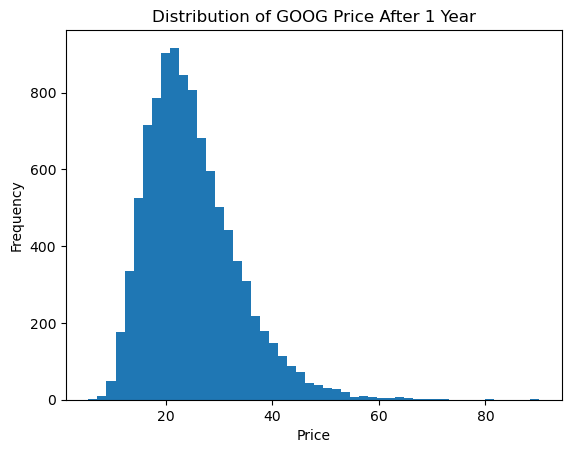

In [10]:
final_prices = price_paths[-1]

plt.hist(final_prices, bins=50)
plt.title("Distribution of GOOG Price After 1 Year")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


**Risk Measures**

We compute Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR)
based on the simulated distribution.


In [11]:
VaR_5 = np.percentile(final_prices, 5)
CVaR_5 = final_prices[final_prices <= VaR_5].mean()

VaR_5, CVaR_5


(13.616533674701927, 12.02824380648695)

**Monte Carlo Simulation: Portfolio**

We now extend the simulation to a multi-asset portfolio.


In [12]:
weights = np.array([0.5, 0.5])

mu_p = weights @ mu.values
sigma_p = np.sqrt(weights @ np.diag(sigma.values**2) @ weights)

mu_p, sigma_p

(0.00040126895508503296, 0.013042528845055693)

In [13]:
portfolio_returns_sim = np.random.normal(
    mu_p,
    sigma_p,
    size=(T, N)
)

P0 = (S.iloc[-1] @ weights)

portfolio_paths = P0 * np.exp(np.cumsum(portfolio_returns_sim, axis=0))


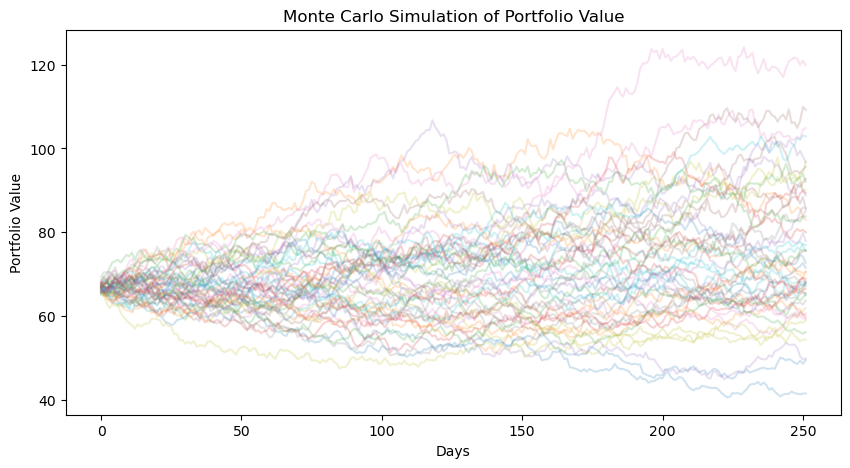

In [14]:
plt.figure(figsize=(10,5))
plt.plot(portfolio_paths[:, :50], alpha=0.2)
plt.title("Monte Carlo Simulation of Portfolio Value")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.show()


In [15]:
final_portfolio = portfolio_paths[-1]

VaR_5_p = np.percentile(final_portfolio, 5)
CVaR_5_p = final_portfolio[final_portfolio <= VaR_5_p].mean()

VaR_5_p, CVaR_5_p


(52.38571581848993, 47.989158013962324)

**Summary**

- Monte Carlo simulation was used to generate future price scenarios.
- Both single-asset and portfolio simulations were performed.
- The distribution of terminal values provides insight into downside risk.
- Risk measures such as VaR and CVaR were computed from simulated data.
